<a href="https://colab.research.google.com/github/Patrick-Setubal/data_science_analytics/blob/main/alura_curso/FormacaoMachineLearning/ClassificacaoSKLearn/Introducao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primeiro Modelo

In [2]:
# Importar os dados
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd 

link = 'https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv'
dados = pd.read_csv(link)
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [3]:
# Separar colunas x e y
x = dados[["home","how_it_works", "contact"]]
y = dados["bought"]

# Definir treino e teste
SEED = 20 
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.25, random_state=SEED,
                                                    stratify=y)

modelo = LinearSVC()
modelo.fit(X_train,y_train)
previsoes = modelo.predict(X_test)

accuracy = accuracy_score(y_test,previsoes)
print("Taxa de acerto: ", round(accuracy*100,2),"%")

Taxa de acerto:  96.0 %


# Segundo Modelo

## Definição do problema

Contextualizando
- Existe um site onde pode-se solicitar trabalhos de Dev
  Neste site você descreve qual trabalho deseja, informa os detalhes do projeto, e o valor que pretende pagar pelo projeto. 

- Algumas solicitações de projeto não são executadas por ter um valor baixo e uma grande carga horaria.

Objetivo
- Crie um modelo que consegue prever se o projeto será ou não executado para informar ao solicitante a chance de algum Dev executar o projeto solicitado.

Recurso
- Para isso temos o Dataset com a informação da carga horaria do projeto, valor e se foi ou não executado.

## Tratando Os dados

In [4]:
# Importando os datos
import pandas as pd
uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [5]:
# Renomeando colunas
a_renomear = {
    'unfinished': 'nao_finalizado',
    'expected_hours': 'carga_horaria',
    'price': 'preco'
}

dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,carga_horaria,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [6]:
# Alterando Não_finalizados para coluna finalizados
trocar = {0:1,
          1:0}
dados['finalizado'] = dados['nao_finalizado'].map(trocar)
dados.drop(columns='nao_finalizado', inplace=True)
dados.tail()

,carga_horaria,preco,finalizado
2152,80,7518,1
2153,52,1332,0
2154,40,473,1
2155,75,5324,1
2156,37,377,0


## Analise Exploratoria

<Axes: xlabel='carga_horaria', ylabel='preco'>

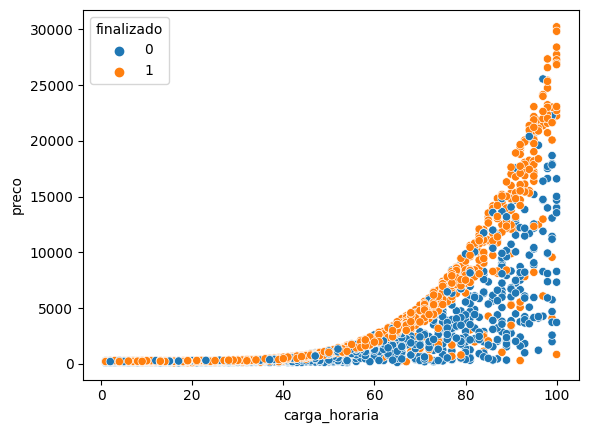

In [7]:
# Importando Biblioteca para plotar Graficos
import seaborn as sns

sns.scatterplot(x='carga_horaria', y='preco', data=dados, hue='finalizado')

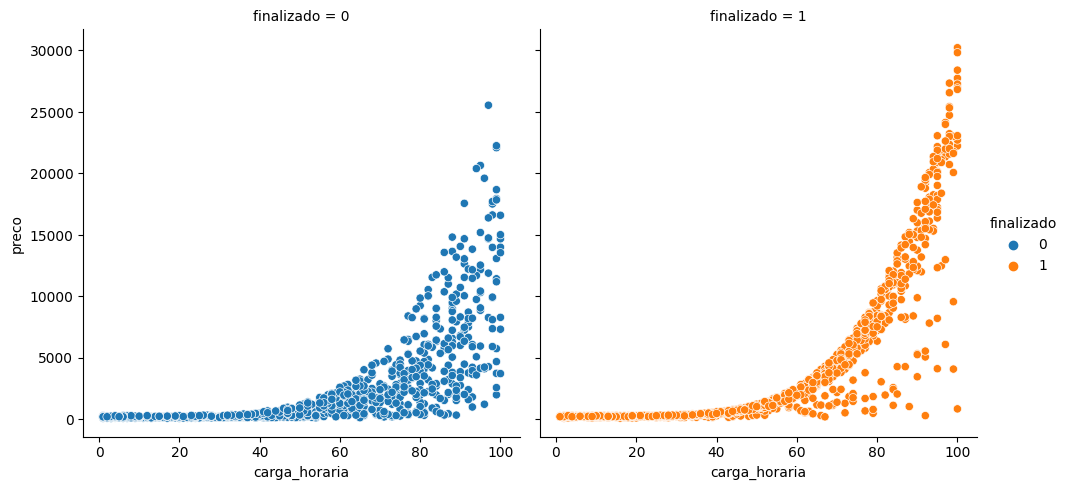

In [8]:
sns.relplot(x='carga_horaria', y='preco', data=dados, col='finalizado', hue='finalizado')

## Criação do Modelo

In [9]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Separando X e Y
x = dados[['carga_horaria','preco']]
y = dados['finalizado']

SEED = 20

# Definindo Treino e teste
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        random_state= SEED, test_size= 0.25,
                                                        stratify= y)

# Definindo o Modelo
modelo = LinearSVC()

# Treinando o Modelo
modelo.fit(treino_x, treino_y)

# Testando o modelo
previsoes = modelo.predict(teste_x)

# Verificando sua acuracia
acuracia = accuracy_score(teste_y, previsoes)
print("Acuracia do Modelo é de:",round(acuracia*100, 2),"$")




Acuracia do Modelo é de: 54.26 $


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [10]:
# Criar uma Baseline para comparar a acuracia
import numpy as np

previsoes_de_base = np.ones(len(teste_x))
acuracia = accuracy_score(teste_y, previsoes_de_base)
print("A Baseline é de: ",round(acuracia*100, 2),"%")

A Baseline é de:  52.59 %
